In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_w6a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

C:\Users\Utente\AppData\Local\Temp\ipykernel_12764\1971369652.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
C = 0.5
sgd_steps = (1, 0.5, 0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00005)
sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0005)
sls_steps = (1, 0.1, 0.01, 0.005)
armijo_damps = (0.3, 0.5, 0.7, 0.9)
momentum_damps = (0.5, 0.7)

# w1a

In [5]:
data_w1a = load_w1a()

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}


In [3]:
Mw1a_grid = (32, 64)
print(f"Iterations: {load_w1a()[1].size / Mw1a_grid[1]}")

Iterations: 38.703125


## Benchmark

In [4]:
benchw1a = run_bench(load_w1a(), C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [5]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), (load_w1a()[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.874986
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.009992
Epochs: 12


In [6]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), Mw1a_grid, sgd_steps)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, load_w1a(), Mw1a_grid, sgdd_steps)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, load_w1a(), Mw1a_grid, sgd_steps)

{'batch': 32, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 11.885810
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667311
Run-time (seconds): 0.153759
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 13.642201
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000792
Sol norm: 0.667400
Run-time (seconds): 0.201343
Epochs: 27
% ----- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 25.401099
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000978
Sol norm: 0.667383
Run-time (seconds): 5.441535
Epochs: 386


In [7]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps)

{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 74.660804
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.9713995599932307
Objective function: 0.536467
Grad norm: 0.363829
Sol norm: 0.454883
Run-time (seconds): 6.868315
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.7}
Grid search run-time (seconds): 153.481972
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009149
Sol norm: 0.665656
Run-time (seconds): 6.138379
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 77.205503
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009144
Sol norm: 0.665659
Run-time (seconds): 6.298822
Epochs: 600


In [8]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
3,SGD-Fixed,0.5,2477.0,1.000,0.0,0.464614,0.000564,0.009992,12,0.970933,0.970236,0.500000,0.500000,0.667389
5,SGD-Decreasing,0.5,64.0,0.500,0.0,0.464614,0.000792,0.201343,27,0.970933,0.970236,0.500000,0.500000,0.667400
4,SGD-Fixed,0.5,32.0,0.010,0.0,0.464615,0.000852,0.153759,27,0.970933,0.970236,0.500000,0.500000,0.667311
6,SGDM,0.5,32.0,0.010,0.9,0.464615,0.000978,5.441535,386,0.970933,0.970236,0.500000,0.500000,0.667383
9,MSL-SGDM-R,0.5,64.0,0.005,0.9,0.464693,0.009144,6.298822,600,0.970933,0.970236,0.500000,0.500000,0.665659
8,MSL-SGDM-C,0.5,64.0,0.005,0.9,0.464693,0.009149,6.138379,600,0.970933,0.970236,0.500000,0.500000,0.665656
7,SGD-Armijo,0.5,64.0,0.100,0.0,0.536467,0.363829,6.868315,600,0.973355,0.971400,0.541667,0.519545,0.454883


In [ ]:
print(test_w1a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

## SGD

In [15]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, data_w1a[1].size)

Run-time (seconds): 0.325757


In [16]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, Mw1a)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, data_w1a, Mw1a)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, data_w1a, Mw1a)

Run-time (seconds): 3.246166
Run-time (seconds): 3.250002
Run-time (seconds): 3.234178


In [17]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, data_w1a, Mw1a, delta_a=0.9)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, data_w1a, Mw1a, delta_a=0.9)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, data_w1a, Mw1a, delta_a=0.9)

Run-time (seconds): 4.576416
Run-time (seconds): 4.843787
Run-time (seconds): 4.828105


In [18]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [19]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,2.987466e-16,0.092534,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.464614,3.223885e-05,1.046895,200,0.970933,0.970236,0.500000,0.500000,0.667409
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.078116,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,32.0,1.00,0.0,0.464614,3.964254e-04,1.078086,200,0.970933,0.970236,0.500000,0.500000,0.667487
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.464615,9.837897e-04,1.046711,200,0.970933,0.970236,0.500000,0.500000,0.667700
13,SGDM,0.5,32.0,0.10,0.9,0.464616,1.427547e-03,1.044113,200,0.970933,0.970236,0.500000,0.500000,0.667781
12,SGDM,0.5,32.0,1.00,0.9,0.464762,1.268830e-02,1.065202,200,0.970933,0.970236,0.500000,0.500000,0.672487


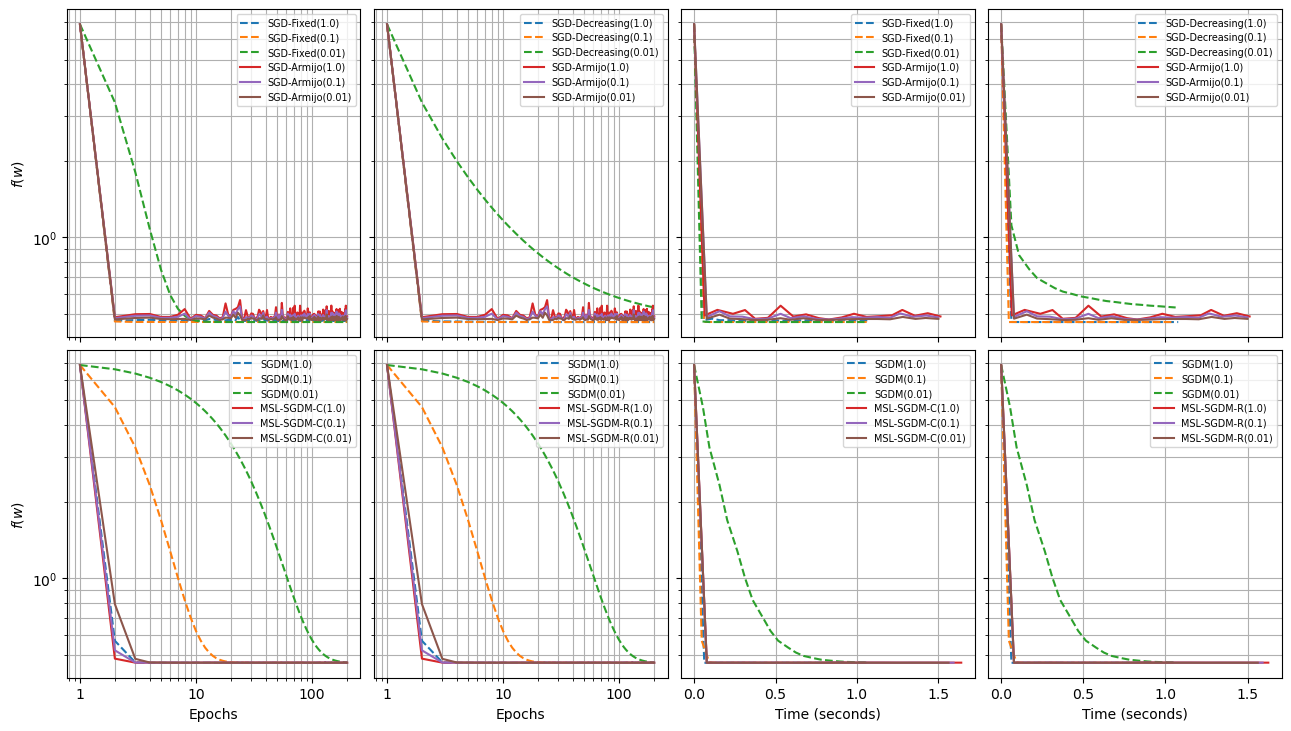

In [20]:
diagnostic(
    optim_data(sgdfixed_w1a + sgdarmijo_w1a),
    optim_data(sgddecre_w1a + sgdarmijo_w1a),
    optim_data(sgdm_w1a + mslc_w1a),
    optim_data(sgdm_w1a + mslr_w1a),
    benchw1a[0])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [21]:
data_w3a = load_w3a()

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}


In [22]:
Mw3a = 64
print(f"Iterations: {data_w3a[1].size / Mw3a}")

Iterations: 76.75


## Benchmark

In [23]:
benchw3a = run_bench(data_w3a, C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [ ]:
batchfixed_w3a1, _ = grid_search_par("SGD-Fixed", C, data_w3a, (data_w3a[1].size,), sgd_steps)

In [ ]:
sgdfixed_w3a1, _ = grid_search_par("SGD-Fixed", C, data_w3a, (Mw3a,), sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search_par("SGD-Decreasing", C, data_w3a, (Mw3a,), sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search_par("SGDM", C, data_w3a, (Mw3a,), sgd_steps)

In [ ]:
sgdarmijo_w3a1, _ = grid_search_par("SGD-Armijo", C, data_w3a, (Mw3a,), sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_w3a1, _ = grid_search_par("MSL-SGDM-C", C, data_w3a, (Mw3a,), sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_w3a1, _ = grid_search_par("MSL-SGDM-R", C, data_w3a, (Mw3a,), sls_steps, delta_a=armijo_damps)

In [31]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.5,0.5,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.5,0.5,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.5,0.5,0.666658
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,0.000564,0.022759,12,0.970888,0.970203,0.5,0.5,0.666635
4,SGD-Fixed,0.5,64.0,0.01,0.0,0.462743,0.000949,0.142884,23,0.970888,0.970203,0.5,0.5,0.666893
6,SGDM,0.5,64.0,0.10,0.9,0.462743,0.000895,0.271357,45,0.970888,0.970203,0.5,0.5,0.666594
5,SGD-Decreasing,0.5,64.0,1.00,0.0,0.462743,0.000989,0.427140,72,0.970888,0.970203,0.5,0.5,0.667086
8,MSL-SGDM-C,0.5,64.0,0.01,0.9,0.463035,0.019061,5.138656,600,0.970888,0.970203,0.5,0.5,0.680138
9,MSL-SGDM-R,0.5,64.0,0.01,0.9,0.463035,0.019062,5.284555,600,0.970888,0.970203,0.5,0.5,0.680138
7,SGD-Armijo,0.5,64.0,0.01,0.0,0.471685,0.107145,5.006394,600,0.970888,0.970203,0.5,0.5,0.736475


In [32]:
print(test_w3a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 6 & NaN & 0.462742 & 0.000011 & 0.970203 \\
CG & NaN & 7 & NaN & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & NaN & 7 & NaN & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 1.000000 & 12 & 0.022759 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Fixed & 0.010000 & 23 & 0.142884 & 0.462743 & 0.000949 & 0.970203 \\
SGDM & 0.100000 & 45 & 0.271357 & 0.462743 & 0.000895 & 0.970203 \\
SGD-Decreasing & 1.000000 & 72 & 0.427140 & 0.462743 & 0.000989 & 0.970203 \\
MSL-SGDM-C & 0.010000 & 600 & 5.138656 & 0.463035 & 0.019061 & 0.970203 \\
MSL-SGDM-R & 0.010000 & 600 & 5.284555 & 0.463035 & 0.019062 & 0.970203 \\
SGD-Armijo & 0.010000 & 600 & 5.006394 & 0.471685 & 0.107145 & 0.970203 \\
\bottomrule
\end{tabular}



## SGD

In [33]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, data_w3a[1].size)

Run-time (seconds): 0.481142


In [34]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, Mw3a)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, data_w3a, Mw3a)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, data_w3a, Mw3a)

Run-time (seconds): 3.392442
Run-time (seconds): 3.419255
Run-time (seconds): 3.372346


In [35]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, data_w3a, Mw3a, delta_a=0.9)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, data_w3a, Mw3a, delta_a=0.9)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, data_w3a, Mw3a, delta_a=0.9)

Run-time (seconds): 4.720795
Run-time (seconds): 5.047076
Run-time (seconds): 4.966712


In [36]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [37]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.138853,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.462742,2.245811e-05,1.097130,200,0.970888,0.970203,0.500000,0.500000,0.666654
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.138530,200,0.970888,0.970203,0.500000,0.500000,0.666639
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.462742,2.262531e-04,1.105148,200,0.970888,0.970203,0.500000,0.500000,0.666628
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.462742,6.384729e-04,1.085381,200,0.970888,0.970203,0.500000,0.500000,0.666490
13,SGDM,0.5,64.0,0.10,0.9,0.462743,1.069982e-03,1.100766,200,0.970888,0.970203,0.500000,0.500000,0.666326
12,SGDM,0.5,64.0,1.00,0.9,0.462848,1.069797e-02,1.105683,200,0.970888,0.970203,0.500000,0.500000,0.663021


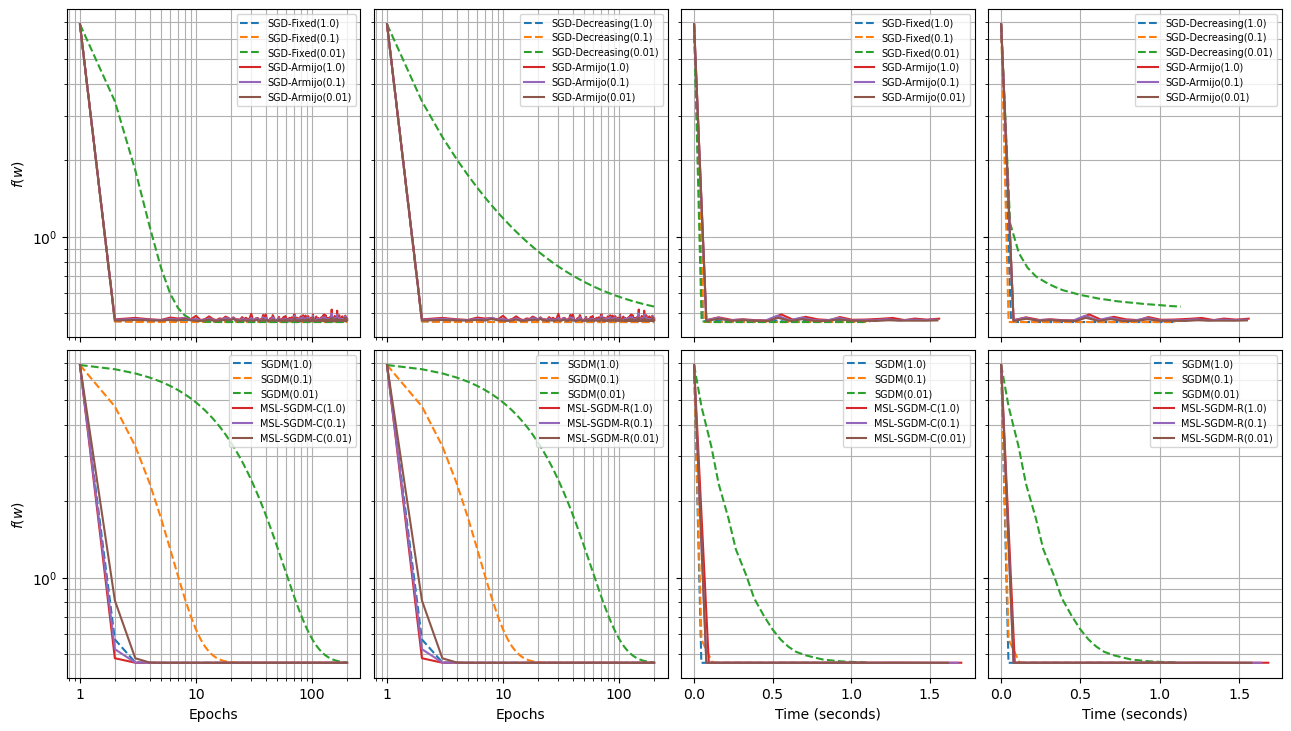

In [38]:
diagnostic(
    optim_data(sgdfixed_w3a + sgdarmijo_w3a),
    optim_data(sgddecre_w3a + sgdarmijo_w3a),
    optim_data(sgdm_w3a + mslc_w3a),
    optim_data(sgdm_w3a + mslr_w3a),
    benchw3a[0])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [39]:
data_phish = load_phishing()

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}


In [42]:
Mphish = 128
print(f"Iterations: {data_phish[1].size / Mphish}")

Iterations: 69.09375


## Benchmark

In [41]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [43]:
batchfixed_phish1, _ = grid_search_par("SGD-Fixed", C, data_phish, (data_phish[1].size,), sgd_steps)

(8844, 0.0001, 0)
Grid search run-time (seconds): 2.010023
-----
Solver: SGD-Fixed
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.028163
Epochs: 11


In [44]:
sgdfixed_phish1, _ = grid_search_par("SGD-Fixed", C, data_phish, (Mphish,), sgd_steps)
print("% ----- %")
sgddecre_phish1, _ = grid_search_par("SGD-Decreasing", C, data_phish, (Mphish,), sgdd_steps)
print("% ----- %")
sgdm_phish1, _ = grid_search_par("SGDM", C, data_phish, (Mphish,), sgd_steps)

(128, 0.0001, 0)
Grid search run-time (seconds): 6.992661
-----
Solver: SGD-Fixed
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000847
Sol norm: 0.163737
Run-time (seconds): 0.124487
Epochs: 21
(128, 0.001, 0)
Grid search run-time (seconds): 3.620563
-----
Solver: SGD-Decreasing
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000508
Sol norm: 0.164270
Run-time (seconds): 0.032359
Epochs: 6
(128, 0.0001, 0.9)
Grid search run-time (seconds): 5.740260
-----
Solver: SGDM
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000702
Sol norm: 0.164089
Run-time (seconds): 0.253226
Epochs: 41


In [45]:
sgdarmijo_phish1, _ = grid_search_par("SGD-Armijo", C, data_phish, (Mphish,), sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_phish1, _ = grid_search_par("MSL-SGDM-C", C, data_phish, (Mphish,), sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_phish1, _ = grid_search_par("MSL-SGDM-R", C, data_phish, (Mphish,), sls_steps, delta_a=armijo_damps)

(128, 0.01, 0, 0.9)
Grid search run-time (seconds): 10.431069
-----
Solver: SGD-Armijo
Train score: 0.8603573043871552
Test score: 0.8652193577566711
Objective function: 0.687736
Grad norm: 0.066541
Sol norm: 0.144155
Run-time (seconds): 5.302133
Epochs: 600
(128, 0.01, 0.9, 0.9, 0.5)
Grid search run-time (seconds): 12.485156
-----
Solver: MSL-SGDM-C
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685099
Grad norm: 0.006864
Sol norm: 0.162974
Run-time (seconds): 6.212785
Epochs: 600
(128, 0.01, 0.9, 0.9)
Grid search run-time (seconds): 12.096496
-----
Solver: MSL-SGDM-R
Train score: 0.5542740841248304
Test score: 0.5676164631388512
Objective function: 0.685102
Grad norm: 0.007043
Sol norm: 0.167324
Run-time (seconds): 6.142169
Epochs: 600


In [46]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
5,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,5.077752e-04,0.032359,6,0.554274,0.567616,0.500000,0.500000,0.164270
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,5.343408e-04,0.028163,11,0.554274,0.567616,0.500000,0.500000,0.164001
6,SGDM,0.5,128.0,0.10,0.9,0.685065,7.023917e-04,0.253226,41,0.554274,0.567616,0.500000,0.500000,0.164089
4,SGD-Fixed,0.5,128.0,0.01,0.0,0.685065,8.474703e-04,0.124487,21,0.554274,0.567616,0.500000,0.500000,0.163737
8,MSL-SGDM-C,0.5,128.0,1.00,0.9,0.685099,6.864239e-03,6.212785,600,0.554274,0.567616,0.500000,0.500000,0.162974
9,MSL-SGDM-R,0.5,128.0,0.50,0.9,0.685102,7.043486e-03,6.142169,600,0.554274,0.567616,0.500000,0.500000,0.167324
7,SGD-Armijo,0.5,128.0,0.01,0.0,0.687736,6.654144e-02,5.302133,600,0.860357,0.865219,0.847576,0.848254,0.144155


In [47]:
print(test_phish[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & NaN & 5 & NaN & 0.685065 & 0.000008 & 0.567616 \\
CG & NaN & 6 & NaN & 0.685065 & 0.000023 & 0.567616 \\
SGD-Decreasing & 0.100000 & 6 & 0.032359 & 0.685065 & 0.000508 & 0.567616 \\
SGD-Fixed & 1.000000 & 11 & 0.028163 & 0.685065 & 0.000534 & 0.567616 \\
SGDM & 0.100000 & 41 & 0.253226 & 0.685065 & 0.000702 & 0.567616 \\
SGD-Fixed & 0.010000 & 21 & 0.124487 & 0.685065 & 0.000847 & 0.567616 \\
MSL-SGDM-C & 1.000000 & 600 & 6.212785 & 0.685099 & 0.006864 & 0.567616 \\
MSL-SGDM-R & 0.500000 & 600 & 6.142169 & 0.685102 & 0.007043 & 0.567616 \\
SGD-Armijo & 0.010000 & 600 & 5.302133 & 0.687736 & 0.066541 & 0.865219 \\
\bottomrule
\end{tabular}



## SGD

In [48]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, data_phish[1].size)

Run-time (seconds): 1.080863


In [49]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, Mphish)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, Mphish)
# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, Mphish)

Run-time (seconds): 3.334003
Run-time (seconds): 3.325983
Run-time (seconds): 3.370911


In [50]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, Mphish, delta_a=0.9)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, Mphish, delta_a=0.9)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, Mphish, delta_a=0.9)

Run-time (seconds): 4.754743
Run-time (seconds): 5.745908
Run-time (seconds): 5.562526


In [51]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [52]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.366447,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,1.096206,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.347251,200,0.554274,0.567616,0.500000,0.500000,0.164175
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,1.780320e-04,1.108237,200,0.554274,0.567616,0.500000,0.500000,0.164100
16,SGDM,0.5,128.0,0.10,0.9,0.685065,3.250223e-04,1.123668,200,0.554274,0.567616,0.500000,0.500000,0.164351
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.685065,5.224586e-04,1.109434,200,0.554274,0.567616,0.500000,0.500000,0.163919
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.685074,3.159654e-03,1.094236,200,0.554274,0.567616,0.500000,0.500000,0.163651


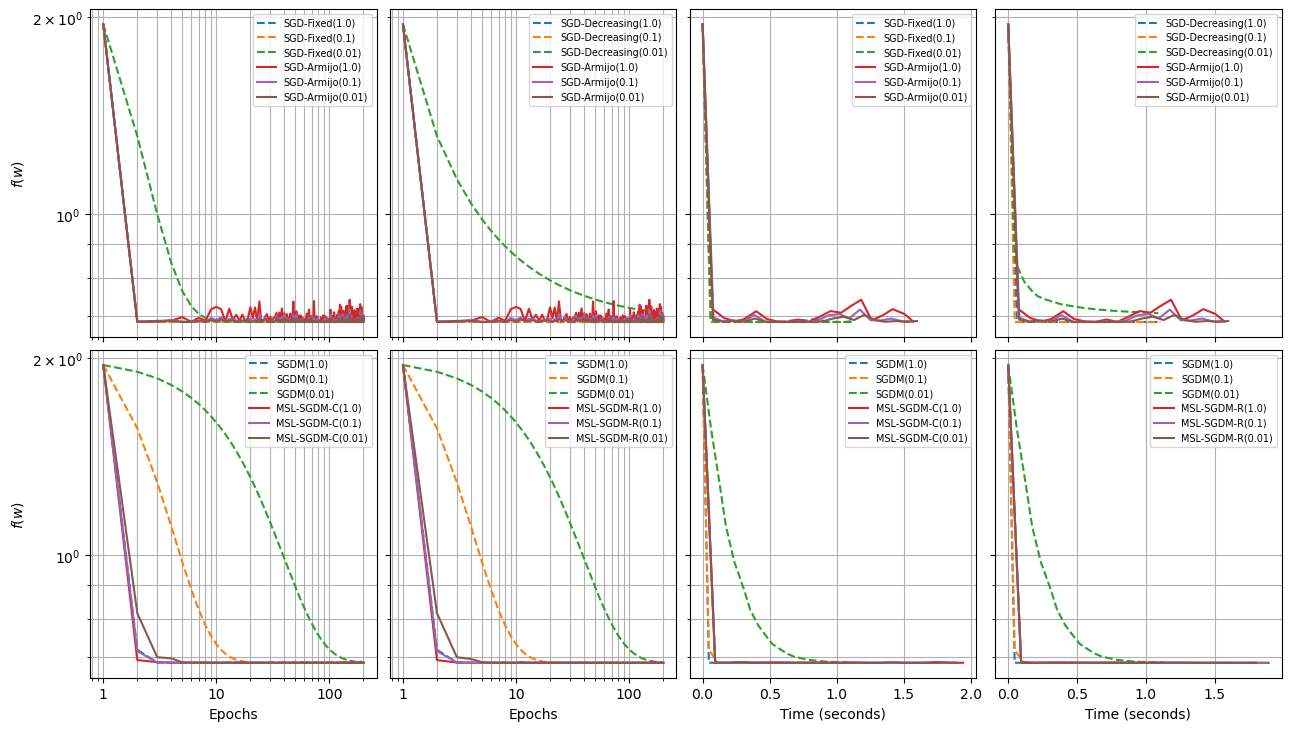

In [53]:
diagnostic(
    optim_data(sgdfixed_phish + sgdarmijo_phish),
    optim_data(sgddecre_phish + sgdarmijo_phish),
    optim_data(sgdm_phish + mslc_phish),
    optim_data(sgdm_phish + mslr_phish),
    benchphish[0])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [3]:
data_a2a = load_a2a()

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Class distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}


In [4]:
Ma2a = 32
print(f"Iterations: {data_a2a[1].size / Ma2a}")

Iterations: 70.78125


## Benchmark

In [5]:
bencha2a = run_bench(data_a2a, C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [7]:
batchfixed_a2a1, _ = grid_search_par("SGD-Fixed", C, data_a2a, (data_a2a[1].size,), sgd_steps)

(2265, 0.0001, 0)
Grid search run-time (seconds): 1.118341
-----
Solver: SGD-Fixed
Train score: 0.7483443708609272
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000756
Sol norm: 0.438952
Run-time (seconds): 0.010284
Epochs: 26


In [8]:
sgdfixed_a2a1, _ = grid_search_par("SGD-Fixed", C, data_a2a, (Ma2a,), sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search_par("SGD-Decreasing", C, data_a2a, (Ma2a,), sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search_par("SGDM", C, data_a2a, (Ma2a,), sgd_steps)

(32, 0.0001, 0)
Grid search run-time (seconds): 6.052953
-----
Solver: SGD-Fixed
Train score: 0.7483443708609272
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000986
Sol norm: 0.438991
Run-time (seconds): 1.038956
Epochs: 208
(32, 0.001, 0)
Grid search run-time (seconds): 3.338040
-----
Solver: SGD-Decreasing
Train score: 0.7483443708609272
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000778
Sol norm: 0.438941
Run-time (seconds): 0.069205
Epochs: 14
(32, 0.0001, 0.9)
Grid search run-time (seconds): 6.093935
-----
Solver: SGDM
Train score: 0.7483443708609272
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000952
Sol norm: 0.439070
Run-time (seconds): 2.126368
Epochs: 414


In [9]:
sgdarmijo_a2a1, _ = grid_search_par("SGD-Armijo", C, data_a2a, (Ma2a,), sls_steps, delta_a=armijo_damps)
print("% ------- %")
mslc_a2a1, _ = grid_search_par("MSL-SGDM-C", C, data_a2a, (Ma2a,), sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ------- %")
mslr_a2a1, _ = grid_search_par("MSL-SGDM-R", C, data_a2a, (Ma2a,), sls_steps, delta_a=armijo_damps)

(32, 0.01, 0, 0.9)
Grid search run-time (seconds): 10.621368
-----
Solver: SGD-Armijo
Train score: 0.7739514348785872
Test score: 0.7816213361499867
Objective function: 0.582406
Grad norm: 0.238127
Sol norm: 0.412356
Run-time (seconds): 5.266210
Epochs: 600
(32, 0.01, 0.9, 0.9, 0.5)
Grid search run-time (seconds): 10.782773
-----
Solver: MSL-SGDM-C
Train score: 0.7483443708609272
Test score: 0.7608265117507261
Objective function: 0.564915
Grad norm: 0.036851
Sol norm: 0.444082
Run-time (seconds): 5.379943
Epochs: 600
(32, 0.01, 0.9, 0.9)
Grid search run-time (seconds): 10.692037
-----
Solver: MSL-SGDM-R
Train score: 0.7483443708609272
Test score: 0.7606944811196198
Objective function: 0.564981
Grad norm: 0.034381
Sol norm: 0.448406
Run-time (seconds): 5.348122
Epochs: 600


In [10]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
5,SGD-Decreasing,0.5,32.0,0.100,0.0,0.564028,0.000778,0.069205,14,0.748344,0.760265,0.501748,0.500413,0.438941
3,SGD-Fixed,0.5,2265.0,0.500,0.0,0.564028,0.000756,0.010284,26,0.748344,0.760265,0.501748,0.500413,0.438952
6,SGDM,0.5,32.0,0.010,0.9,0.564028,0.000952,2.126368,414,0.748344,0.760265,0.501748,0.500413,0.439070
4,SGD-Fixed,0.5,32.0,0.001,0.0,0.564028,0.000986,1.038956,208,0.748344,0.760265,0.501748,0.500413,0.438991
8,MSL-SGDM-C,0.5,32.0,1.000,0.9,0.564915,0.036851,5.379943,600,0.748344,0.760827,0.501748,0.501676,0.444082
9,MSL-SGDM-R,0.5,32.0,0.500,0.9,0.564981,0.034381,5.348122,600,0.748344,0.760694,0.501748,0.501401,0.448406
7,SGD-Armijo,0.5,32.0,1.000,0.0,0.582406,0.238127,5.266210,600,0.773951,0.781621,0.555920,0.549718,0.412356


In [11]:
print(test_a2a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.564027 & 0.000004 & 0.760265 \\
CG & NaN & 12 & NaN & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & NaN & 8 & NaN & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 0.100000 & 14 & 0.069205 & 0.564028 & 0.000778 & 0.760265 \\
SGD-Fixed & 0.500000 & 26 & 0.010284 & 0.564028 & 0.000756 & 0.760265 \\
SGDM & 0.010000 & 414 & 2.126368 & 0.564028 & 0.000952 & 0.760265 \\
SGD-Fixed & 0.001000 & 208 & 1.038956 & 0.564028 & 0.000986 & 0.760265 \\
MSL-SGDM-C & 1.000000 & 600 & 5.379943 & 0.564915 & 0.036851 & 0.760827 \\
MSL-SGDM-R & 0.500000 & 600 & 5.348122 & 0.564981 & 0.034381 & 0.760694 \\
SGD-Armijo & 1.000000 & 600 & 5.266210 & 0.582406 & 0.238127 & 0.781621 \\
\bottomrule
\end{tabular}



## SGD

In [12]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, data_a2a[1].size)

Run-time (seconds): 0.245754


In [13]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, Ma2a)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, data_a2a, Ma2a)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, data_a2a, Ma2a)

Run-time (seconds): 2.869874
Run-time (seconds): 2.839491
Run-time (seconds): 2.830715


In [14]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, data_a2a, Ma2a, delta_a=0.9)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, data_a2a, Ma2a, delta_a=0.9)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, data_a2a, Ma2a, delta_a=0.9)

Run-time (seconds): 4.883918
Run-time (seconds): 4.926086
Run-time (seconds): 4.831273


In [15]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [16]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
4,SGD-Fixed,0.5,2265.0,0.10,0.0,0.564027,0.000046,0.062503,200,0.748344,0.760265,0.501748,0.500413,0.438971
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.564027,0.000058,0.924335,200,0.748344,0.760265,0.501748,0.500413,0.438960
9,SGD-Decreasing,0.5,32.0,1.00,0.0,0.564029,0.002519,0.938309,200,0.748344,0.760265,0.501748,0.500413,0.439612
13,SGDM,0.5,32.0,0.10,0.9,0.564033,0.003560,0.927829,200,0.748344,0.760265,0.501748,0.500413,0.439371
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.564040,0.007099,0.941501,200,0.748344,0.760265,0.501748,0.500413,0.440964
12,SGDM,0.5,32.0,1.00,0.9,0.564445,0.026860,0.928841,200,0.748344,0.760529,0.501748,0.501057,0.439078
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,0.937365,200,0.748344,0.760331,0.501748,0.500597,0.436755


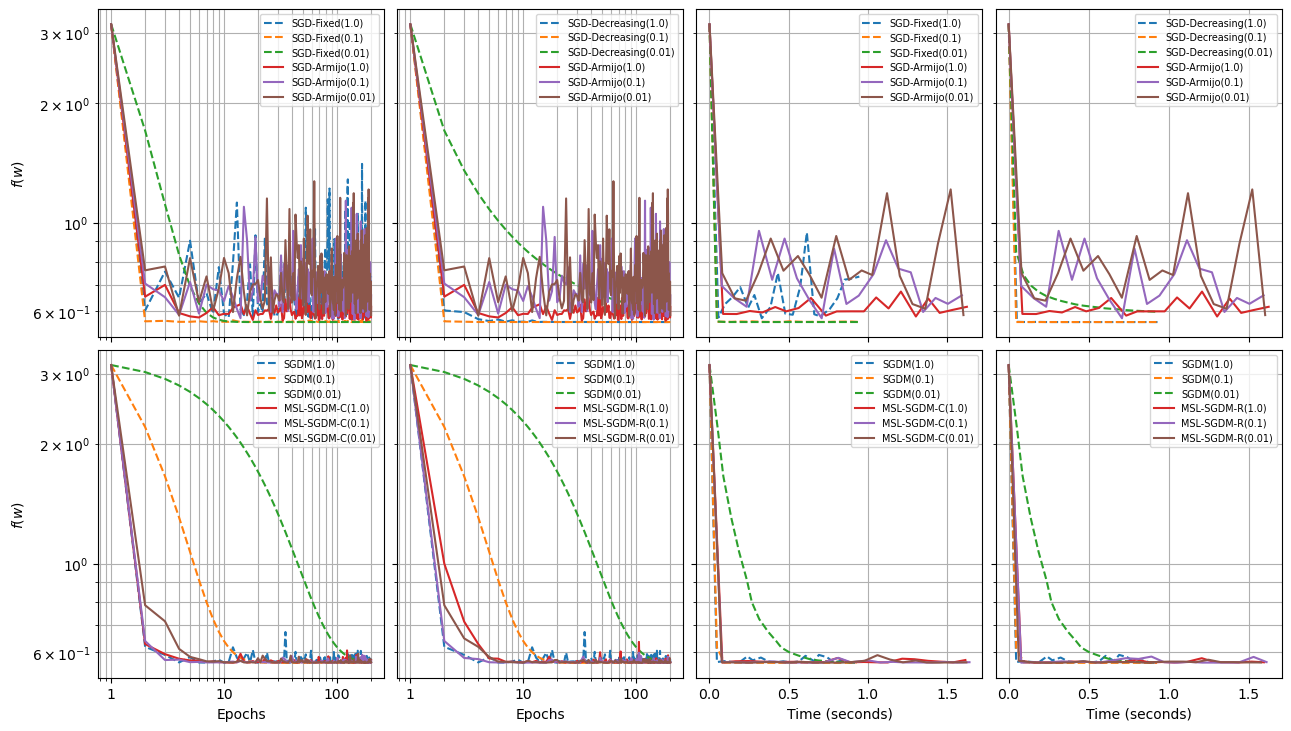

In [17]:
diagnostic(
    optim_data(sgdfixed_a2a + sgdarmijo_a2a),
    optim_data(sgddecre_a2a + sgdarmijo_a2a),
    optim_data(sgdm_a2a + mslc_a2a),
    optim_data(sgdm_a2a + mslr_a2a),
    bencha2a[0])
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [18]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [19]:
Mmush = 128
print(f"Iterations: {data_mush[1].size / Mmush}")

Iterations: 50.7734375


## Benchmark

In [20]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [21]:
batchfixed_mush1, _ = grid_search_par("SGD-Fixed", C, data_mush, (data_mush[1].size,), sgd_steps)

(6499, 0.0001, 0)
Grid search run-time (seconds): 1.427027
-----
Solver: SGD-Fixed
Train score: 0.8953685182335744
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000757
Sol norm: 0.635906
Run-time (seconds): 0.035176
Epochs: 26


In [22]:
sgdfixed_mush1, _ = grid_search_par("SGD-Fixed", C, data_mush, (Mmush,), sgd_steps)
print("% ----- %")
sgddecre_mush1, _ = grid_search_par("SGD-Decreasing", C, data_mush, (Mmush,), sgdd_steps)
print("% ----- %")
sgdm_mush1, _ = grid_search_par("SGDM", C, data_mush, (Mmush,), sgd_steps)

(128, 0.0001, 0)
Grid search run-time (seconds): 4.964281
-----
Solver: SGD-Fixed
Train score: 0.8953685182335744
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000902
Sol norm: 0.636401
Run-time (seconds): 0.169166
Epochs: 41
(128, 0.001, 0)
Grid search run-time (seconds): 2.764260
-----
Solver: SGD-Decreasing
Train score: 0.8955223880597015
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000622
Sol norm: 0.635942
Run-time (seconds): 0.061633
Epochs: 13
(128, 0.0001, 0.9)
Grid search run-time (seconds): 4.977599
-----
Solver: SGDM
Train score: 0.8956762578858286
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000981
Sol norm: 0.635785
Run-time (seconds): 0.350876
Epochs: 81


In [23]:
sgdarmijo_mush1, _ = grid_search_par("SGD-Armijo", C, data_mush, (Mmush,), sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_mush1, _ = grid_search_par("MSL-SGDM-C", C, data_mush, (Mmush,), sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_mush1, _ = grid_search_par("MSL-SGDM-R", C, data_mush, (Mmush,), sls_steps, delta_a=armijo_damps)

(128, 0.01, 0, 0.9)
Grid search run-time (seconds): 9.442372
-----
Solver: SGD-Armijo
Train score: 0.9119864594553008
Test score: 0.908923076923077
Objective function: 0.521154
Grad norm: 0.076647
Sol norm: 0.618237
Run-time (seconds): 4.605918
Epochs: 600
(128, 0.01, 0.9, 0.9, 0.5)
Grid search run-time (seconds): 9.584872
-----
Solver: MSL-SGDM-C
Train score: 0.8973688259732266
Test score: 0.8953846153846153
Objective function: 0.518177
Grad norm: 0.023181
Sol norm: 0.636251
Run-time (seconds): 4.655162
Epochs: 600
(128, 0.01, 0.9, 0.9)
Grid search run-time (seconds): 9.386045
-----
Solver: MSL-SGDM-R
Train score: 0.8950607785813202
Test score: 0.8910769230769231
Objective function: 0.517960
Grad norm: 0.018322
Sol norm: 0.644023
Run-time (seconds): 4.662079
Epochs: 600


In [24]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.000902,0.169166,41,0.895369,0.892923,0.892246,0.889580,0.636401
5,SGD-Decreasing,0.5,128.0,0.10,0.0,0.517727,0.000622,0.061633,13,0.895522,0.892923,0.892406,0.889580,0.635942
3,SGD-Fixed,0.5,6499.0,0.50,0.0,0.517727,0.000757,0.035176,26,0.895369,0.892923,0.892246,0.889580,0.635906
6,SGDM,0.5,128.0,0.10,0.9,0.517727,0.000981,0.350876,81,0.895676,0.892923,0.892565,0.889580,0.635785
9,MSL-SGDM-R,0.5,128.0,0.10,0.9,0.517960,0.018322,4.662079,600,0.895061,0.891077,0.891971,0.887661,0.644023
8,MSL-SGDM-C,0.5,128.0,0.10,0.9,0.518177,0.023181,4.655162,600,0.897369,0.895385,0.894364,0.892137,0.636251
7,SGD-Armijo,0.5,128.0,0.10,0.0,0.521154,0.076647,4.605918,600,0.911986,0.908923,0.909488,0.906204,0.618237


In [25]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.517726 & 0.000003 & 0.892923 \\
CG & NaN & 11 & NaN & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & NaN & 10 & NaN & 0.517726 & 0.000017 & 0.892923 \\
SGD-Fixed & 0.010000 & 41 & 0.169166 & 0.517727 & 0.000902 & 0.892923 \\
SGD-Decreasing & 0.100000 & 13 & 0.061633 & 0.517727 & 0.000622 & 0.892923 \\
SGD-Fixed & 0.500000 & 26 & 0.035176 & 0.517727 & 0.000757 & 0.892923 \\
SGDM & 0.100000 & 81 & 0.350876 & 0.517727 & 0.000981 & 0.892923 \\
MSL-SGDM-R & 0.100000 & 600 & 4.662079 & 0.517960 & 0.018322 & 0.891077 \\
MSL-SGDM-C & 0.100000 & 600 & 4.655162 & 0.518177 & 0.023181 & 0.895385 \\
SGD-Armijo & 0.100000 & 600 & 4.605918 & 0.521154 & 0.076647 & 0.908923 \\
\bottomrule
\end{tabular}



## SGD

In [26]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, data_mush[1].size)

Run-time (seconds): 0.605886


In [27]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, Mmush)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, Mmush)
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, Mmush)

Run-time (seconds): 2.367155
Run-time (seconds): 2.351843
Run-time (seconds): 2.347459


In [28]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, Mmush, delta_a=0.9)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, Mmush, delta_a=0.9)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, Mmush, delta_a=0.9)

Run-time (seconds): 4.319532
Run-time (seconds): 4.330232
Run-time (seconds): 4.294714


In [29]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [30]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.517726,0.000011,0.760374,200,0.895522,0.892923,0.892406,0.889580,0.635940
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,6499.0,0.10,0.0,0.517726,0.000046,0.189318,200,0.895522,0.892923,0.892406,0.889580,0.635932
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.517726,0.000244,0.783542,200,0.895522,0.892923,0.892406,0.889580,0.636065
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.002024,0.783808,200,0.895215,0.892923,0.892087,0.889580,0.636349
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,0.789460,200,0.896138,0.894769,0.893077,0.891498,0.635850
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,0.771580,200,0.898292,0.897231,0.895332,0.894055,0.637874
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.517936,0.027047,0.764770,200,0.896753,0.894154,0.893737,0.890905,0.641649


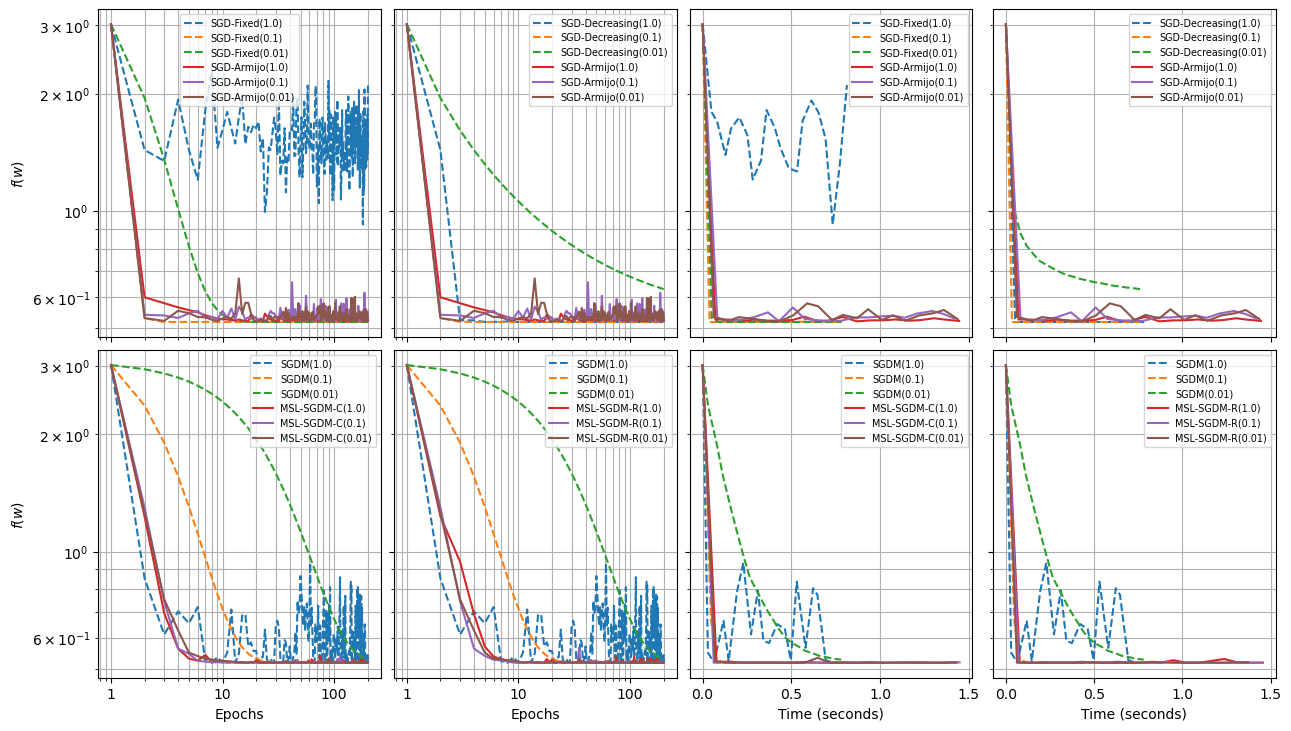

In [31]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

# German

In [32]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [33]:
Mgerman = 16
print(f"Iterations: {data_german[1].size / Mgerman}")

Iterations: 50.0


## Benchmark

In [34]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## Fine-tuning

In [35]:
batchfixed_german1, _ = grid_search_par("SGD-Fixed", C, data_german, (data_german[1].size,), sgd_steps)

(800, 0.0001, 0)
Grid search run-time (seconds): 0.304718
-----
Solver: SGD-Fixed
Train score: 0.70375
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000882
Sol norm: 0.358324
Run-time (seconds): 0.001787
Epochs: 20


In [37]:
sgdfixed_german1, _ = grid_search_par("SGD-Fixed", C, data_german, (Mgerman,), sgdd_steps)
print("% ----- %")
sgddecre_german1, _ = grid_search_par("SGD-Decreasing", C, data_german, (Mgerman,), sgd_steps)
print("% ----- %")
sgdm_german1, _ = grid_search_par("SGDM", C, data_german, (Mgerman,), sgd_steps)

(16, 0.001, 0)
Grid search run-time (seconds): 4.196329
-----
Solver: SGD-Fixed
Train score: 0.70375
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000985
Sol norm: 0.358262
Run-time (seconds): 0.817973
Epochs: 231
% ----- %
(16, 0.0001, 0)
Grid search run-time (seconds): 2.773697
-----
Solver: SGD-Decreasing
Train score: 0.70375
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000799
Sol norm: 0.358666
Run-time (seconds): 0.058973
Epochs: 17
% ----- %
(16, 0.0001, 0.9)
Grid search run-time (seconds): 4.324577
-----
Solver: SGDM
Train score: 0.70375
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000974
Sol norm: 0.358654
Run-time (seconds): 1.768767
Epochs: 482


In [38]:
sgdarmijo_german1, _ = grid_search_par("SGD-Armijo", C, data_german, (Mgerman,), sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_german1, _ = grid_search_par("MSL-SGDM-C", C, data_german, (Mgerman,), sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_german1, _ = grid_search_par("MSL-SGDM-R", C, data_german, (Mgerman,), sls_steps, delta_a=armijo_damps)

(16, 0.01, 0, 0.9)
Grid search run-time (seconds): 8.107337
-----
Solver: SGD-Armijo
Train score: 0.70125
Test score: 0.705
Objective function: 0.629855
Grad norm: 0.288438
Sol norm: 0.431052
Run-time (seconds): 3.691313
Epochs: 600
% ----- %
(16, 0.01, 0.9, 0.9, 0.5)
Grid search run-time (seconds): 8.027036
-----
Solver: MSL-SGDM-C
Train score: 0.71625
Test score: 0.715
Objective function: 0.598986
Grad norm: 0.055237
Sol norm: 0.366484
Run-time (seconds): 3.944260
Epochs: 600
% ----- %
(16, 0.01, 0.9, 0.9)
Grid search run-time (seconds): 7.849353
-----
Solver: MSL-SGDM-R
Train score: 0.70375
Test score: 0.705
Objective function: 0.599962
Grad norm: 0.064046
Sol norm: 0.342140
Run-time (seconds): 3.987929
Epochs: 600


In [39]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
5,SGD-Decreasing,0.5,16.0,0.100,0.0,0.597303,0.000799,0.058973,17,0.70375,0.710,0.511839,0.513403,0.358666
3,SGD-Fixed,0.5,800.0,0.500,0.0,0.597303,0.000882,0.001787,20,0.70375,0.710,0.511839,0.513403,0.358324
6,SGDM,0.5,16.0,0.010,0.9,0.597303,0.000974,1.768767,482,0.70375,0.710,0.511839,0.513403,0.358654
4,SGD-Fixed,0.5,16.0,0.001,0.0,0.597303,0.000985,0.817973,231,0.70375,0.710,0.511839,0.513403,0.358262
8,MSL-SGDM-C,0.5,16.0,0.100,0.9,0.598986,0.055237,3.944260,600,0.71625,0.715,0.537307,0.526806,0.366484
9,MSL-SGDM-R,0.5,16.0,0.100,0.9,0.599962,0.064046,3.987929,600,0.70375,0.705,0.511839,0.504928,0.342140
7,SGD-Armijo,0.5,16.0,0.010,0.0,0.629855,0.288438,3.691313,600,0.70125,0.705,0.505330,0.504928,0.431052


In [40]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.597303 & 0.000010 & 0.710000 \\
CG & NaN & 12 & NaN & 0.597303 & 0.000004 & 0.710000 \\
L-BFGS-B & NaN & 7 & NaN & 0.597303 & 0.000014 & 0.710000 \\
SGD-Decreasing & 0.100000 & 17 & 0.058973 & 0.597303 & 0.000799 & 0.710000 \\
SGD-Fixed & 0.500000 & 20 & 0.001787 & 0.597303 & 0.000882 & 0.710000 \\
SGDM & 0.010000 & 482 & 1.768767 & 0.597303 & 0.000974 & 0.710000 \\
SGD-Fixed & 0.001000 & 231 & 0.817973 & 0.597303 & 0.000985 & 0.710000 \\
MSL-SGDM-C & 0.100000 & 600 & 3.944260 & 0.598986 & 0.055237 & 0.715000 \\
MSL-SGDM-R & 0.100000 & 600 & 3.987929 & 0.599962 & 0.064046 & 0.705000 \\
SGD-Armijo & 0.010000 & 600 & 3.691313 & 0.629855 & 0.288438 & 0.705000 \\
\bottomrule
\end{tabular}



## SGD

In [41]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, data_german[1].size)

Run-time (seconds): 0.145939


In [42]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, Mgerman)
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, Mgerman)
# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, Mgerman)

Run-time (seconds): 2.001444
Run-time (seconds): 2.008266
Run-time (seconds): 1.962408


In [43]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, Mgerman, delta_a=0.9)
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, Mgerman, delta_a=0.9)
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, Mgerman, delta=0.9)

Run-time (seconds): 3.643687
Run-time (seconds): 3.708150
Run-time (seconds): 3.222177


In [44]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [45]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,800.0,0.10,0.0,0.597303,0.000007,0.037133,200,0.70375,0.710,0.511839,0.513403,0.358503
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
10,SGD-Decreasing,0.5,16.0,0.10,0.0,0.597303,0.000081,0.677940,200,0.70375,0.710,0.511839,0.513403,0.358516
9,SGD-Decreasing,0.5,16.0,1.00,0.0,0.597304,0.002657,0.661644,200,0.70375,0.710,0.511839,0.513403,0.357565
13,SGDM,0.5,16.0,0.10,0.9,0.597312,0.003659,0.649842,200,0.70375,0.710,0.511839,0.513403,0.356870
8,SGD-Fixed,0.5,16.0,0.01,0.0,0.597325,0.010176,0.661995,200,0.70375,0.710,0.511839,0.513403,0.355071
14,SGDM,0.5,16.0,0.01,0.9,0.598529,0.038325,0.651432,200,0.70375,0.710,0.510659,0.513403,0.347489
7,SGD-Fixed,0.5,16.0,0.10,0.0,0.598941,0.053905,0.678707,200,0.70125,0.700,0.504149,0.496454,0.338814


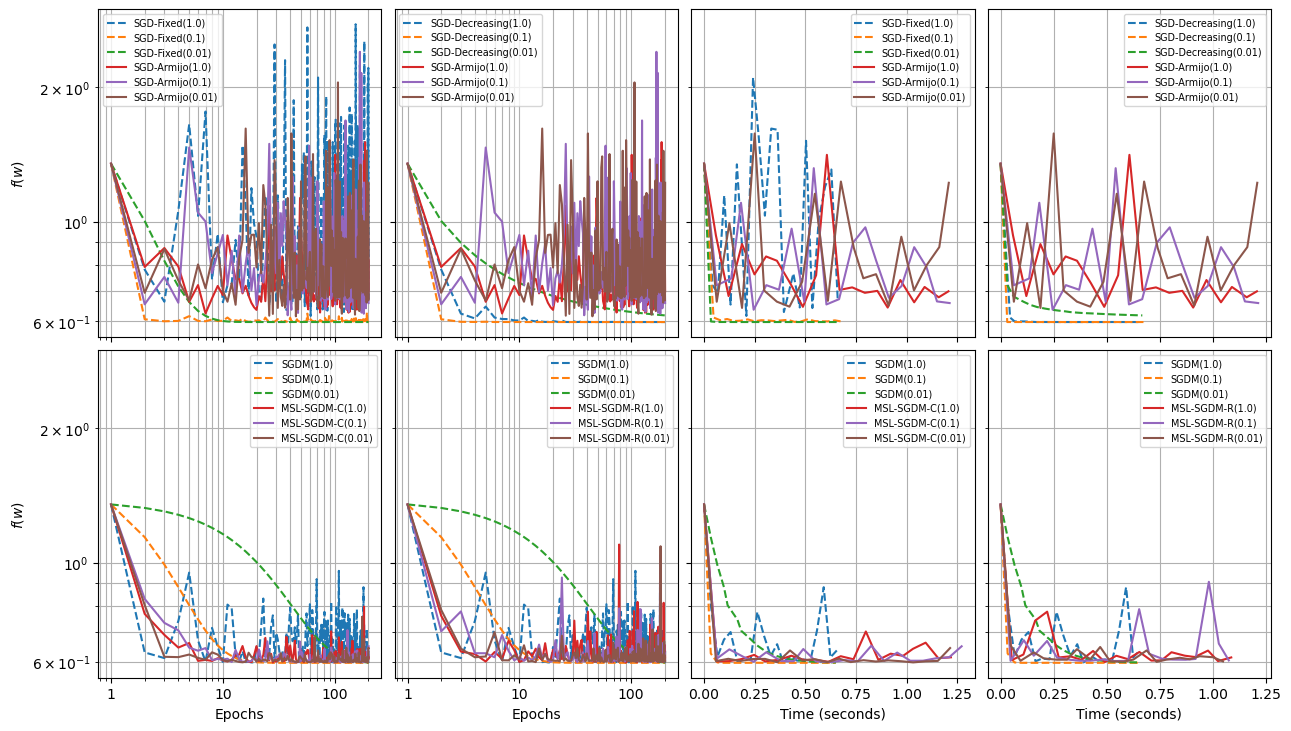

In [46]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")